# Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of our analysis is to determine a few heavy traffic indicators. These can include, but not limited to: __weather type, time of day, time of week, etc.__

## I-94 Traffic Dataset

John Hogue has made the dataset available and can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

#### Dataset Description

* __holiday:__ Categorical US National holidays plus regional holiday, Minnesota State Fair
* __temp:__ Numeric Average temp in kelvin
* __rain_1h:__ Numeric Amount in mm of rain that occurred in the hour
* __snow_1h:__ Numeric Amount in mm of snow that occurred in the hour
* __clouds_all:__ Numeric Percentage of cloud cover
* __weather_main:__ Categorical Short textual description of the current weather
* __weather_description:__ Categorical Longer textual description of the current weather
* __date_time:__ DateTime Hour of the data collected in local CST time
* __traffic_volume:__ Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [17]:
#Import libraries/tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import Dataset
i_94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

#Initial exploratory analysis of dataset(head,tail,info, null/missing values)
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
i_94.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

### Dataset Summary

The dataset contains 48204 entries and 9 columns, and there are no null values. Each row describes hourly traffic and weather data ranging from 2012 - 2018. Additionally, holidays are a feature considered as traffic indicator.

According to the dataset documentation, the data is recorded hourly by a station located approximately midway between Minneapolis and Sain Paul(station 301). Furthermore, the dataset solely includes westbound traffic __(east to west)__. This means that the results of our analysis will be about westbound traffic in proximity to the station. Thus, generalizations for traffic on the entire I-94 should be avoided.  

## Analyzing Traffic Volume

We're going to start by looking at the traffic volume distribution and a few statistics related to it.

Text(0.5, 0, 'Traffic Volume')

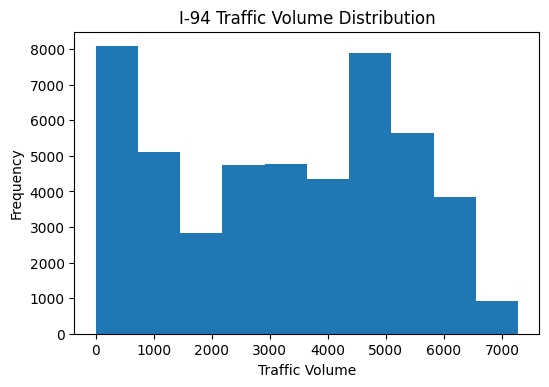

In [5]:
#traffic volume distribution
i_94['traffic_volume'].plot.hist()
plt.title('I-94 Traffic Volume Distribution')
plt.xlabel('Traffic Volume')

In [6]:
#Traffic volume statistics
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From 2012-2018, the hourly traffic volume varied anywhere from 0 - 7280 cars, with an average of 3260 cars.

About 25% of the time there were 1193 cars passing the station, hourly. This lower traffic volume probably occurs at night. In contrast, 25% of the time the traffic volume is four times as much(4933 cars or more).

Thus, daytime and nighttime influence on traffic volume will be explored.

## Traffic Volume: Day vs. Night

We'll start by converting our date_time data from an object to a datetime, followed by dividing our dataset as follows:

* Daytime data: 7am - 7pm(12 hours)
* Nightime Data:7pm - 7am(12 hours)    

In [7]:
#convert date_time feature from object to pandas datetime
i_94['date_time']= pd.to_datetime(i_94['date_time'])

In [8]:
#split data into daytime and nighttime data

#Daytime
i_94_daytime = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(i_94_daytime.shape)

#Nighttime
i_94_nighttime = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(i_94_nighttime.shape)

(23877, 9)
(24327, 9)


(0.0, 8000.0)

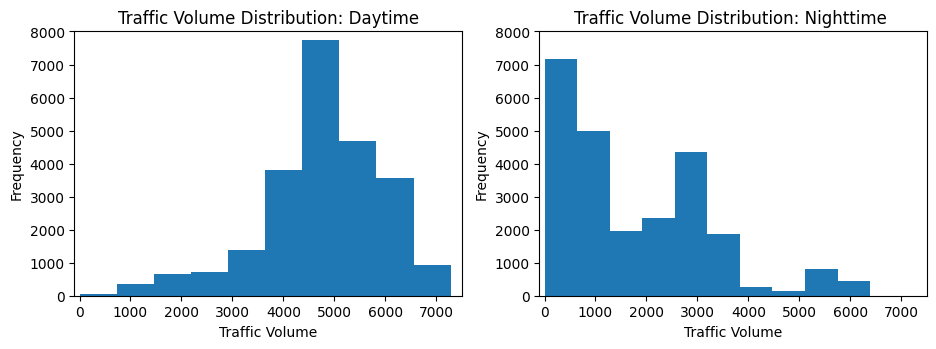

In [9]:
# comparing day and night traffic
plt.figure(figsize=(11,3.5))

#Daytime
plt.subplot(1,2,1)
plt.hist(i_94_daytime['traffic_volume'])
plt.title('Traffic Volume Distribution: Daytime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100,7500)
plt.ylim(0,8000)


plt.subplot(1,2,2)
plt.hist(i_94_nighttime['traffic_volume'])
plt.title('Traffic Volume Distribution: Nighttime ')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100,7500)
plt.ylim(0,8000)

In [10]:
# Traffic Volume: Daytime - Statistics
i_94_daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
#Traffic Volume: Nighttime - Statistics
i_94_nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram displaying the daytime traffic volume distribution is left skewed. This means that most of the traffic volumes values are high. There are 4,256 cars or more cars passing the station per hour.

The histogram displaying the nightime traffic volume distribution is right skewed.This means most of the traffic volume values are low.75% of the time, the number of cars that passed the station per hour was less than 2,819.

Although there are still traffic volume values greater than or equal to 5,000, nightime traffic is generally light. Our goal is to find heavy traffic indicators, so we will focus our attention on the daytime traffic for further analysis moving forward.

### Time Indicators - Month Analysis

One of the possible indicators for heavy traffic is time. There might be more people on the road in a certain time of month, day, or time of day. 

We're going to look at a few time indicators by examining traffic volume per:

* Month
* Day of the week
* Time of day

Text(0, 0.5, 'Traffic volume')

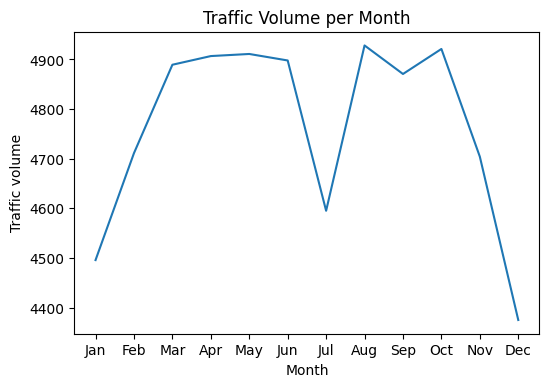

In [12]:
# Traffic Volume per Month
# Split datetime to month by creating a new column
# Groupby month
# Line plot of traffic volume per month

i_94_daytime['month'] = i_94_daytime['date_time'].dt.month
by_month = i_94_daytime.groupby('month').mean()
plt.plot(by_month['traffic_volume'])
plt.title('Traffic Volume per Month')
plt.xlabel('Month')
ticks=list(range(1,13,1))
labels="Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split()
plt.xticks(ticks,labels)
plt.ylabel('Traffic volume')

The traffic is less heavy in winter months(November- February) and more intenst during warm months(March-October) with the exception of July. This is and interesting observation and may discover more if break down analysis per year. 

Did anything in particular happen in July in previous years? Let's see the yearly mean traffic volume trend for the month of July.

Text(0, 0.5, 'Traffic Volume')

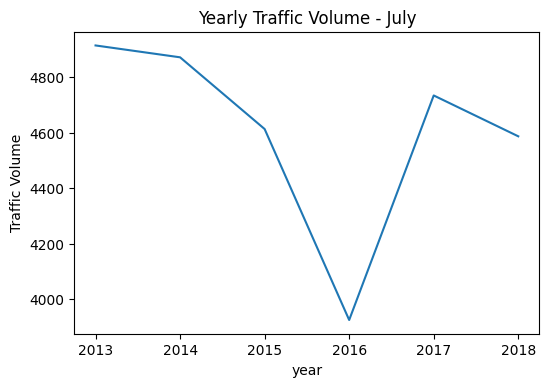

In [13]:
# Analyzing July traffic volume per year
i_94_daytime['year'] = i_94_daytime['date_time'].dt.year
only_july = i_94_daytime[i_94_daytime['month'] == 7]
plt.plot(only_july.groupby('year').mean()['traffic_volume'])
plt.title('Yearly Traffic Volume - July')
plt.xlabel('year')
plt.ylabel('Traffic Volume')

Typically, the traffic is pretty heavy in July in comparison with other warm months with traffic volume values ranging from 4,600 or greater. The only exception was in 2016, which had a decrease in traffic volume. One possible reason for this decrease in traffic volume is road construction. According to the [__Detroit Free Press__](https://www.freep.com/story/news/local/michigan/wayne/2016/06/07/road-construction-on-i94/85554670/) article, I-94 construction along with I-275, and other road construction projects caused long delays and closures.   

### Time Indicators - Day of Week

Let's now take a closer look: day of week

([<matplotlib.axis.XTick at 0x7fe724205190>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tues'),
  Text(0, 0, 'Weds'),
  Text(0, 0, 'Thurs'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

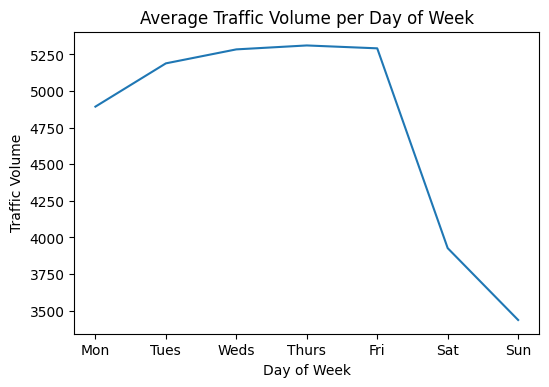

In [14]:
# Generate a day of week column
i_94_daytime['day_of_week'] = i_94_daytime['date_time'].dt.dayofweek
# Group by day of week
by_dayofweek = i_94_daytime.groupby('day_of_week').mean()
# Plot average traffic volume vs. day of week
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Average Traffic Volume per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
ticks= list(range(0,7,1))
labels="Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks,labels)

Traffic volume is significantly heavier during business days(Mon-Fri). Except for mondays, traffic volume is above 5,000. Traffic is much lighter during weekends with values below 4,000.

### Time Indicators - Hour

Let's take an even more granular look: Hour

The weekends, as noted in day of week analysis, will drive the hourly average down, so we are going to look at the averages seperately.

Text(0.5, 1.0, 'Hourly Traffic Volume - Weekend')

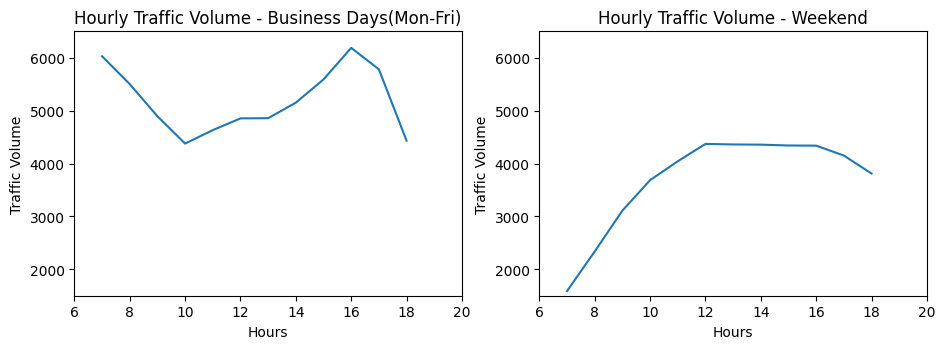

In [15]:
# Create an hour column
i_94_daytime['hour'] = i_94_daytime['date_time'].dt.hour
# Split data into business and weekend data
business_days = i_94_daytime.copy()[i_94_daytime['day_of_week'] <= 4] # 4 = Friday
weekend = i_94_daytime.copy()[i_94_daytime['day_of_week'] >= 5] # 5 == Saturday
# Group by hourly business days
by_hour_business = business_days.groupby('hour').mean()
# Group by hourly weekend days
by_hour_weekend = weekend.groupby('hour').mean()

#Create line plots
plt.figure(figsize=(11,3.5))

# Hourly Business Days Line Plot
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.xlabel('Hours')
plt.ylabel('Traffic Volume')
plt.title('Hourly Traffic Volume - Business Days(Mon-Fri)')

# Hourly Weekend Line Plot
plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.xlabel('Hours')
plt.ylabel('Traffic Volume')
plt.title('Hourly Traffic Volume - Weekend')


At each hour, the traffic is generally higher during business days compared to weekends. Thr rush hours are at 7am and 4pm(indicated by 16 military time), as expected, when most people are traveling from home to work and then back. Traffic volumes hit about 6,000 or more during rush hour peaks.

To summarize, this is what we have found with regards to time-related indicators of heavy traffic:

* The traffic is usually higher in warms months (March-October) compared to cold months (December - February).
* The traffic is usually heavier during business days compared to weekends
* On business days, the two peak hours are at 7am and 4pm(16 military time) respectively.

# Heavy Traffic Indicator: Weather

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

### Weather and traffic_volume correlation

In [19]:
# Pearson correlation coefficient
weather_corr = i_94_daytime.corr(method='pearson')['traffic_volume']
print(weather_corr)

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
day_of_week      -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64


Temperature shows the strongest correlation with a value of +0.13. The other relevant weather columns(rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_volume.

Let's generatre a scatter plot to visualize the correlation between temp and traffic_volume.

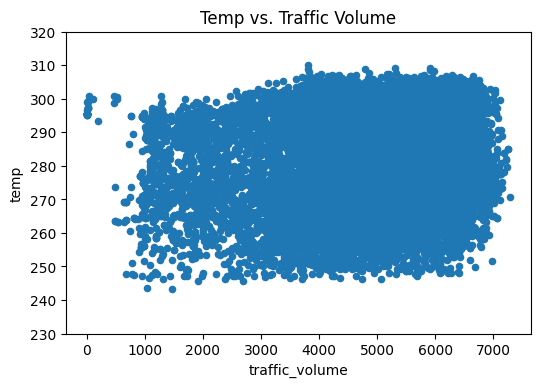

In [32]:
i_94_daytime.plot.scatter('traffic_volume','temp')
plt.title('Temp vs. Traffic Volume')
plt.ylim(230,320)
plt.show()

Based on the scatter plot we can conclude that temperature is not a huge indicator of heavy traffic.

Let's now look at other additional weather columns: weather_main and weather_description 

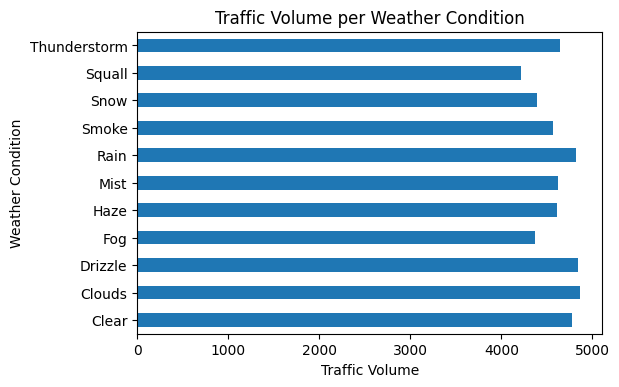

In [38]:
# Group by weather main
by_weather_main = i_94_daytime.groupby('weather_main').mean()
#calculate the average traffic_volume
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Condition')
plt.title('Traffic Volume per Weather Condition')
plt.show()




It looks like there is no particular weather condition where traffic exceeds greater than 5,000 cars. Additionally, most weather conditions seem to have similar effect in terms of traffic volume. 

Let's look at a more granular approach of weather and traffic volume by exploring weather descriptions, which is a more in depth weather classification.

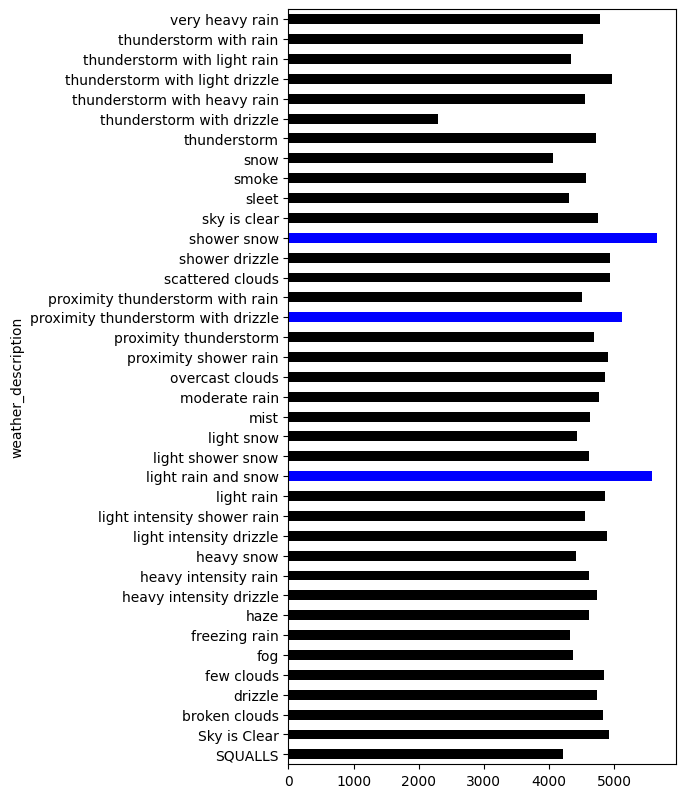

In [43]:
# Group by weather description, calculate average
by_weather_description = i_94_daytime.groupby('weather_description').mean()
# plot traffic volume per weather description
# set color variable when traffic_volume exceeds 5,000
clrs = ['blue' if (x >=5000) else 'black' for x in by_weather_description['traffic_volume']]
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10), color=clrs)
plt.show()


It looks like there are three weather conditions where traffic volume exceeds greater than 5,000 cars:
    * shower snow
    * proximity thunderstorm with drizzle
    * light rain and snow
    
It's not clear why these weather conditions have the highest average traffic volumes when compared to other, perhaps even worst weather conditions. It can be the nature of these conditions that cause drivers to slow down significantly more, but not much more than other weather conditions at least when driving in I-94 westbound.    

# Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate Highway. As a reminder, data was collected in an hourly basis and reflects for westbound traffic. We managed to find two types of indicators:
    
1. __Time Indicators:__
    * The traffic is usually heavier during warm months(March-October) compared to cold months (November-February)
    * The traffic is busier during business days compared to weekends
    * On business days, the peak hours are around 7am and 4pm


2. __Weather Indicators:__
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle
